In [1]:
import os, shutil
import random
import numpy as np
import pandas as pd
import cv2
import skimage
import skimage.segmentation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
labels = ['ayush','dipayan','pratik']
img_size = 128

def get_data(data_dir):
  data = []
  for label in labels:   # ayush, dipayan, pratik
    print(label) 
    path = os.path.join(data_dir, label)  #  path to the folder containing images of a particular person
    class_num = labels.index(label) # 0 for ayush, 1 for dipayan, 2 for pratik
    if class_num == 0:
      print("ayush")
    elif class_num == 1:
      print("dipayan")
    else:
      print("pratik")
    for img in os.listdir(path):  # iterate over each image
      try:
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)   # read image in grayscale mode and convert to array
        if img_arr is None:
          continue #skip image if there is any issue

        resized_arr = cv2.resize(img_arr, (img_size, img_size))   # resize to 128x128 pixels as expected by the model
        

        data.append([resized_arr, class_num]) # data =  [[image_array, class_num], ...]
      except Exception as e:
        print(f"Error in processing {img}: {e}")
  return data


In [43]:
train_data = get_data(r'C:\downloads\FACE_REC\uploads\train')
test_data = get_data(r'C:\downloads\FACE_REC\uploads\test')
val_data = get_data(r'C:\downloads\FACE_REC\uploads\val')

ayush
ayush
dipayan
dipayan
pratik
pratik
ayush
ayush
dipayan
dipayan
pratik
pratik
ayush
ayush
dipayan
dipayan
pratik
pratik


In [44]:
ayush= os.listdir(r'C:\downloads\FACE_REC\uploads\train\ayush') #ayush images
ayush_dir = r'C:\downloads\FACE_REC\uploads\train\ayush' #path to ayush images
dipayan= os.listdir(r'C:\downloads\FACE_REC\uploads\train\dipayan') #dipayan images
dipayan_dir = r'C:\downloads\FACE_REC\uploads\train\dipayan' #path to dipayan images
pratik= os.listdir(r'C:\downloads\FACE_REC\uploads\train\pratik') #pratik images
pratik_dir = r'C:\downloads\FACE_REC\uploads\train\pratik' #path to pratik images

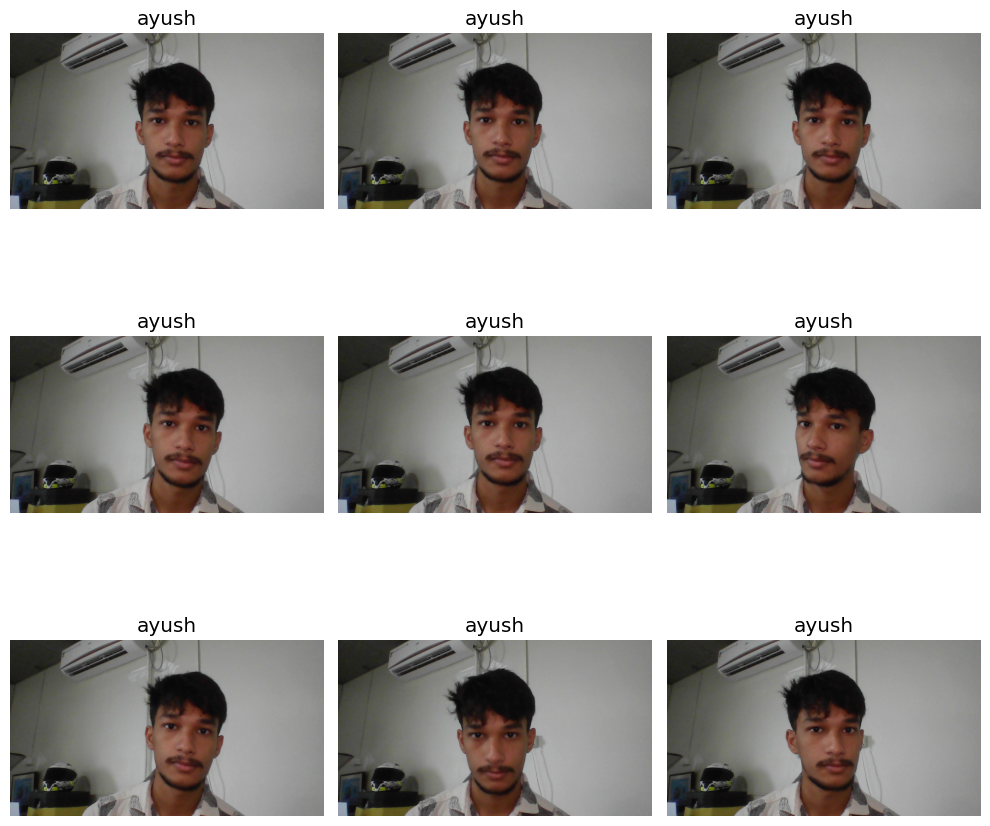

In [45]:
plt.figure(figsize=(10, 10))

for i in range(9):
  plt.subplot(3, 3, i+1)
  img = plt.imread(os.path.join(ayush_dir, ayush[i]))
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.title("ayush")

plt.tight_layout()


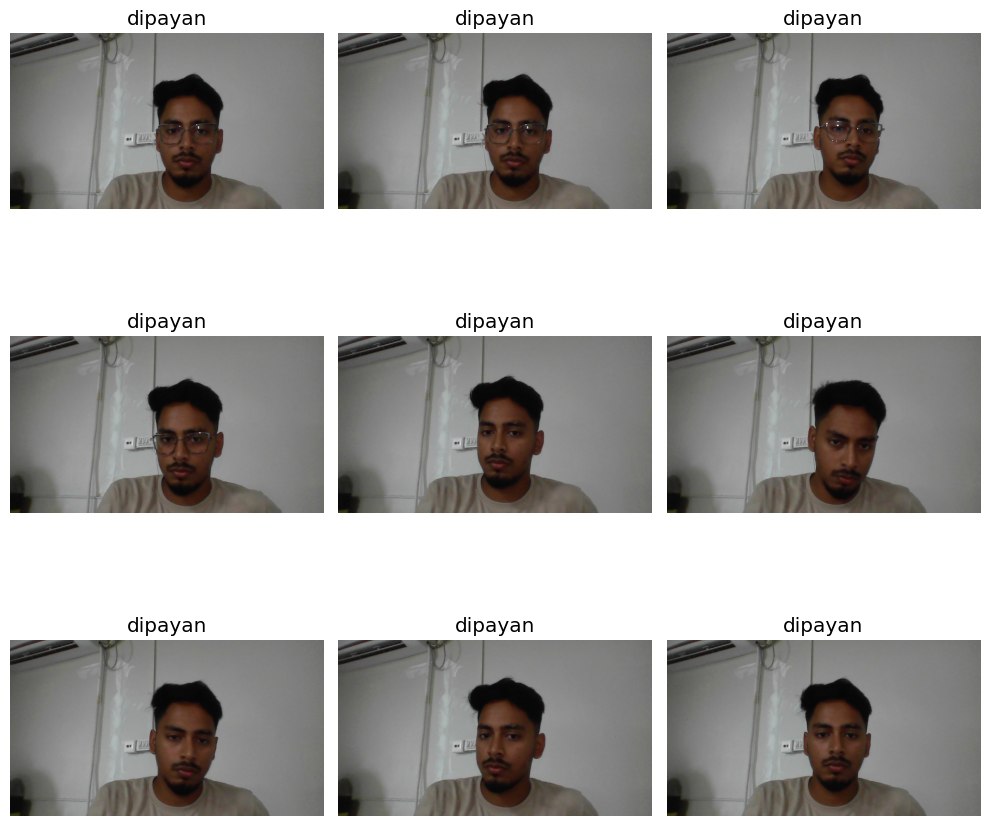

In [46]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(dipayan_dir, dipayan[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("dipayan")
plt.tight_layout()


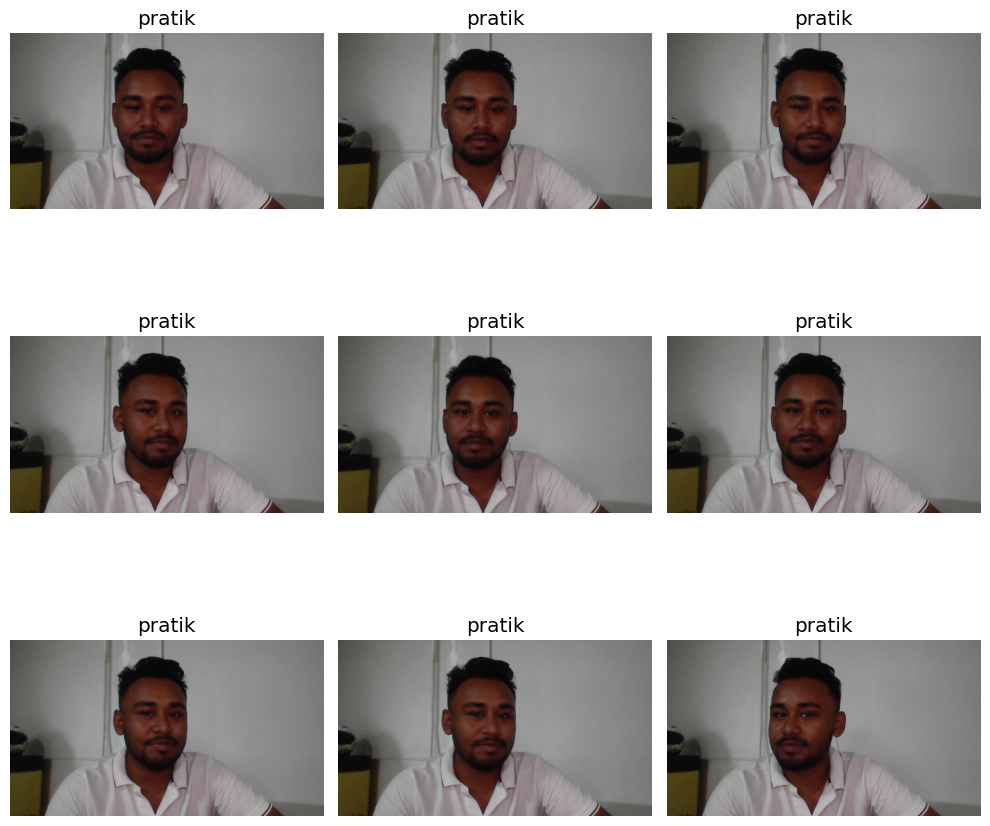

In [47]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(pratik_dir, pratik[i]))
    plt.imshow(img, cmap='gray')    
    plt.axis('off')
    plt.title("pratik")
plt.tight_layout()

In [48]:
#Data Augmentation & Resizing

In [49]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau 

In [50]:
train_datagen = ImageDataGenerator(rescale= 1./255,  # rescale pixel values to [0, 1]
                                   horizontal_flip = 0.4, # randomly flip images horizontally
                                   vertical_flip = 0.4, # randomly flip images vertically
                                   rotation_range = 40, # randomly rotate images by 40 degrees
                                   shear_range = 0.2, # randomly shear images by 20% 
                                   width_shift_range=0.4, # randomly shift images horizontally by 40% of the width
                                   height_shift_range=0.4, # randomly shift images vertically by 40% of the height 
                                   fill_mode = "nearest") # fill in missing pixels with the nearest value
val_datagen = ImageDataGenerator(rescale=1./255)
test_dategen = ImageDataGenerator(rescale=1./255)

In [51]:
train_generator = train_datagen.flow_from_directory(r'C:\downloads\FACE_REC\uploads\train', # path to the training data directory
                                                    batch_size = 32,  # batch size for training
                                                    target_size = (128, 128), # resize images to 128x128 pixels as expected by the model
                                                    class_mode = 'categorical', # use categorical crossentropy loss for multi-class classification
                                                    shuffle = True, # shuffle the training data
                                                    seed = 42, # set random seed for reproducibility
                                                    color_mode = 'rgb') # read images in RGB mode

valid_generator = val_datagen.flow_from_directory(r"C:\downloads\FACE_REC\uploads\val"  ,
                                                    batch_size = 32,
                                                    target_size = (128, 128),
                                                    class_mode = 'categorical',
                                                    shuffle = True,
                                                    seed = 42,
                                                    color_mode = 'rgb')

Found 37 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [52]:
class_labels = train_generator.class_indices
class_labels

{'ayush': 0, 'dipayan': 1, 'pratik': 2}

In [53]:
class_name = {value:key for (key, value) in class_labels.items()}

class_name

{0: 'ayush', 1: 'dipayan', 2: 'pratik'}

In [ ]:
# vgg 16 architecture


from tensorflow.keras.applications import VGG16

In [55]:
base_model = VGG16(input_shape=(128, 128, 3),
                   include_top=False,
                   weights='imagenet')

for layer in base_model.layers:
  layer.trainable = False

x = base_model.output

flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)

dropout = Dropout(0.2)(class_1)

class_2 = Dense(1024, activation = 'relu')(dropout)
output = Dense(3, activation = 'softmax')(class_2)
model_01 = Model(inputs=base_model.input, outputs=output)

model_01.summary()

Model: "functional_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_51 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 4608)           │    37,753,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 1024)           │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,190,723 (218.17 MB)

 Trainable params: 42,476,035 (162.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [62]:
filepath = "model.keras"
es = EarlyStopping(monitor="val_loss", verbose = 1, mode = "min", patience = 4)

cp = ModelCheckpoint(filepath, monitor = "val_loss", save_best_only=True, save_weights_only=False,mode="auto", save_freq="epoch")

lrr = ReduceLROnPlateau(monitor = "val_accuracy", patience=3, verbose = 1, factor=0.5, mil_lr = 0.0001)

sgd = SGD(learning_rate = 0.0001, decay = 1e-6, momentum = 0.1, nesterov = True)
adam= Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

model_01.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics=['accuracy'])


c:\downloads\FACE_REC\venv\lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [64]:
history_01 = model_01.fit(train_generator,
                          steps_per_epoch = 10,  # number of batches to train on per epoch
                          epochs = 10,
                          callbacks = [es, cp, lrr],
                          validation_data = valid_generator
                          )

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8054 - loss: 0.5337 - val_accuracy: 0.8000 - val_loss: 0.6630 - learning_rate: 1.0000e-04
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.7286 - loss: 0.5276 - val_accuracy: 0.4667 - val_loss: 0.8714 - learning_rate: 1.0000e-04
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 0.7568 - loss: 0.6635 - val_accuracy: 0.4667 - val_loss: 0.9007 - learning_rate: 1.0000e-04
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8079 - loss: 0.6184 - val_accuracy: 0.9333 - val_loss: 0.5260 - learning_rate: 1.0000e-04
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.8659 - loss: 0.3924 - val_accuracy: 0.7333 - val_loss: 0.5897 - learning_rate: 1.0000e-04
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.7561 - loss: 0.6867 - val_accuracy: 0.7333 - val_loss: 0.5489 - learning_rate: 1.0000e-04
Epoch 7/10
 2/10 ━━━━━━━━━━━━━━━━━━━━ 4s 560ms/step - accuracy: 0.67

In [1]:
import dlib
print(dlib.DLIB_USE_CUDA)


False


In [3]:
import cv2
image_path = r"C:\downloads\FACE_REC\uploads"
image = cv2.imread(image_path)
if image is None:
    print(f"Error loading image: {image_path}")
else:
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


Error loading image: C:\downloads\FACE_REC\uploads


In [17]:
import os

folder = r"C:\downloads\FACE_REC\uploads"
files = os.listdir(folder)
print(files)


['ayush', 'dipayan']


In [18]:
import cv2
import os

folder = r"C:\downloads\FACE_REC\uploads"
image_path = os.path.join(folder, filename)
image = cv2.imread(image_path)
if image is None:
    print(f"Failed to load image: {image_path}")
else:
    print(f"Loaded image: {image_path}")



Failed to load image: C:\downloads\FACE_REC\uploads\pratik


In [20]:
from PIL import Image
import os

input_folder = r"C:\downloads\FACE_REC\uploads"

for filename in os.listdir(input_folder):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path).convert("RGB")  # ensure it's RGB
        img.save(img_path)  # overwrite or change extension to .jpg


In [22]:
import cv2
import os

image_path = r"C:\downloads\FACE_REC\uploads"
image = cv2.imread(image_path)

if image is None:
    print("Image load failed!")
else:
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # अब इसको MediaPipe या face_recognition में दो


Image load failed!


In [27]:
import cv2

image_path = (r"C:\downloads\FACE_REC\uploads\ayush\ayush.jpg")
image = cv2.imread(image_path)  # ये BGR format में आएगा

if image is None:
    print("Image load नहीं हो पाया, path चेक करो!")
else:
    # OpenCV से BGR को RGB में convert करो क्योंकि MediaPipe को RGB चाहिए
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    print("Image loaded और RGB में convert हो गया!")
    
    print("Image dtype:", image_rgb.dtype)   # ये होना चाहिए: uint8
    print("Image shape:", image_rgb.shape)   # shape होना चाहिए: (height, width, 3)


Image loaded और RGB में convert हो गया!
Image dtype: uint8
Image shape: (720, 1280, 3)


In [29]:
# Dataset folder path


import os
import cv2
import face_recognition
import pickle
dataset_path = (r"C:\downloads\FACE_REC\uploads")    
known_encodings = []
known_names = []

# Loop over each person’s folder
for person_name in os.listdir(dataset_path):
    person_folder = os.path.join(dataset_path, person_name)
    
    for image_name in os.listdir(person_folder):       # Loop over each image for each person
        image_path = os.path.join(person_folder, image_name)    # Get image path
        
        image = cv2.imread(image_path)           # Read image file and convert to RGB
        rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        boxes = face_recognition.face_locations(rgb, model='hog')      # Get face locations from image file with HOG model  there are two model hog - light weight and fast and cnn - heavy weight AND GPU support needed
        encodings = face_recognition.face_encodings(rgb, boxes)       # Get face encodings from image file  in 128 dimension

        for encoding in encodings:
            known_encodings.append(encoding)          # Add face encoding to known encodings list
            known_names.append(person_name)           # Add person name to known names list


RuntimeError: Unsupported image type, must be 8bit gray or RGB image.

In [35]:
image = cv2.imread(image_path)
if image is None:
    print(f"Image at {image_path} नहीं पढ़ी गई, इसे स्किप करो।")
    


In [38]:
import os
import cv2

input_folder = r'C:\downloads\FACE_REC\uploads'
output_folder = 'fixed_dataset'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for person in os.listdir(input_folder):
    person_path = os.path.join(input_folder, person)
    fixed_person_path = os.path.join(output_folder, person)
    if not os.path.exists(fixed_person_path):
        os.makedirs(fixed_person_path)
    
    for img_name in os.listdir(person_path):
        img_path = os.path.join(person_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Skipped corrupt image: {img_path}")
            continue
        
        # अगर grayscale है तो RGB में convert करो
        if len(img.shape) == 2:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

        # Save back in standard BGR format
        save_path = os.path.join(fixed_person_path, img_name)
        cv2.imwrite(save_path, img)

print("Dataset images fixed and saved in fixed_dataset folder.")


Dataset images fixed and saved in fixed_dataset folder.


In [57]:
if len(img.shape) == 2:
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Image shape after conversion:", img.shape)
print("Image dtype after conversion:", img.dtype)

Image shape after conversion: (128, 128, 3)
Image dtype after conversion: uint8


In [47]:
import face_recognition
face_locations = face_recognition.face_locations(img)
print(f"Found {len(face_locations)} face(s)")


RuntimeError: Unsupported image type, must be 8bit gray or RGB image.

In [49]:
small_image = cv2.resize(image, (640, 480))


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
import os
import cv2
import face_recognition
import pickle

def encode_faces(dataset_path, encoding_file):

    known_encodings = []
    known_names = []

    for person_name in os.listdir(dataset_path):
        person_folder = os.path.join(dataset_path, person_name)
        if not os.path.isdir(person_folder):
            continue 

        print(f"[INFO] Processing folder: {person_name}")

        for image_name in os.listdir(person_folder):
            image_path = os.path.join(person_folder, image_name)

            try:
           
                image = cv2.imread(image_path)

                if image is None:
                    print(f"[WARNING] Unable to read image: {image_path}")
                    continue

                # Color conversion BGR to RGB
                rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                encodings = face_recognition.face_encodings(rgb_image)

                if len(encodings) == 0:
                    print(f"[WARNING] No faces found in image: {image_path}")
                    continue

                encoding = encodings[0]

                known_encodings.append(encoding)
                known_names.append(person_name)

                print(f"[SUCCESS] Encoded {image_path}")

            except Exception as e:
                print(f"[ERROR] Failed to process image {image_path}: {str(e)}")

    
    print(f"[INFO] Serializing encodings to {encoding_file} ...")
    data = {"encodings": known_encodings, "names": known_names}
    with open(encoding_file, "wb") as f:
        pickle.dump(data, f)

    print("[INFO] Encoding process complete!")



if __name__ == "__main__":
    dataset_path = (r"C:\downloads\FACE_REC\uploads")  
    encoding_file = "encodings.pickle"
    encode_faces(dataset_path, encoding_file)


[INFO] Processing folder: ayush
[ERROR] Failed to process image C:\downloads\FACE_REC\uploads\ayush\ayush (10).jpg: Unsupported image type, must be 8bit gray or RGB image.
[ERROR] Failed to process image C:\downloads\FACE_REC\uploads\ayush\ayush (11).jpg: Unsupported image type, must be 8bit gray or RGB image.
[ERROR] Failed to process image C:\downloads\FACE_REC\uploads\ayush\ayush (2).jpg: Unsupported image type, must be 8bit gray or RGB image.
[ERROR] Failed to process image C:\downloads\FACE_REC\uploads\ayush\ayush (3).jpg: Unsupported image type, must be 8bit gray or RGB image.
[ERROR] Failed to process image C:\downloads\FACE_REC\uploads\ayush\ayush (4).jpg: Unsupported image type, must be 8bit gray or RGB image.
[ERROR] Failed to process image C:\downloads\FACE_REC\uploads\ayush\ayush (5).jpg: Unsupported image type, must be 8bit gray or RGB image.
[ERROR] Failed to process image C:\downloads\FACE_REC\uploads\ayush\ayush (6).jpg: Unsupported image type, must be 8bit gray or RGB 